## GRASP

In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

In [2]:
num_trials = 5
resources = [5, 10, 15, 20]

def opt_bound(R, p):
    _, m, r, = lpt(R, p)
    return m / r

def lpt_value(R, p):
    _, m, _, = lpt(R, p)
    return m

def makespan(R, p, cc_ratio=0.5, max_iters=1000, hc_iters=10):
    _, m = grasp(R=R, p=p, cc_ratio=cc_ratio, max_iters=max_iters, hc_iters=hc_iters)
    return m

## Comparison on sub-optimal instance

### Varying candidate component ratio

In [3]:
def eval_subopt_lpt(R):
    _, m, r, = lpt(R, p=suboptimal_instance(R))
    return m / r, m

lpt_df = pd.DataFrame(data=(eval_subopt_lpt(R) for R in resources), index=resources, columns=['opt_bound', 'lpt'])

In [4]:
def eval_subopt_grasp(**kwargs):
    for R in resources:
        yield sum(makespan(R, suboptimal_instance(R), **kwargs) for _ in range(num_trials)) / num_trials

In [5]:
cc_ratios = [0.25, 0.5, 0.75]

grasp_df = pd.DataFrame({f'grasp ({cc_ratio})': eval_subopt_grasp(cc_ratio=cc_ratio) for cc_ratio in cc_ratios}, index=resources)

pd.concat([lpt_df, grasp_df], axis=1)

,opt_bound,lpt,grasp (0.25),grasp (0.5),grasp (0.75)
5,13.571429,19.0,16.0,16.0,16.0
10,28.536585,39.0,37.2,36.8,37.8
15,43.524590,59.0,64.2,63.4,64.0
20,58.518519,79.0,91.4,91.0,89.2


<AxesSubplot:title={'center':'Quality relative to LPT for sub-optimal instances'}, ylabel='#resources (R)'>

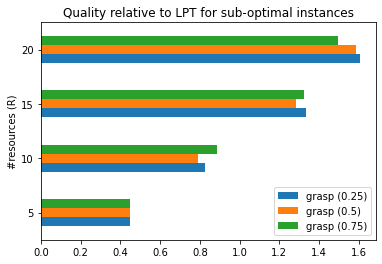

In [6]:
df = grasp_df.sub(lpt_df.opt_bound, axis=0).div(lpt_df.lpt - lpt_df.opt_bound, axis=0)
df.plot.barh(ylabel='norm. quality(GRASP)/quality(LPT)', xlabel='#resources (R)', title='Quality relative to LPT for sub-optimal instances')

### Exploitation effect of Hill Climbing

In [9]:
hc_iters_choices = [0, 10, 100]

grasp_df = pd.DataFrame({f'grasp (HC-{hc_iters})': eval_subopt_grasp(hc_iters=hc_iters) for hc_iters in hc_iters_choices}, index=resources)

pd.concat([lpt_df, grasp_df], axis=1)

,opt_bound,lpt,grasp (HC-0),grasp (HC-10),grasp (HC-100)
5,13.571429,19.0,16.8,16.0,15.2
10,28.536585,39.0,40.8,38.0,33.2
15,43.524590,59.0,67.4,63.2,54.6
20,58.518519,79.0,94.6,90.2,81.4


<AxesSubplot:title={'center':'Quality relative to LPT for sub-optimal instances'}, ylabel='#resources (R)'>

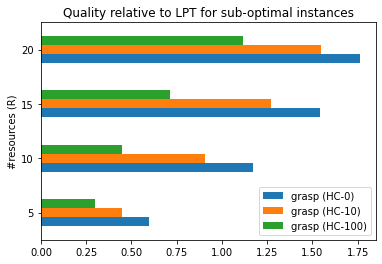

In [10]:
df = grasp_df.sub(lpt_df.opt_bound, axis=0).div(lpt_df.lpt - lpt_df.opt_bound, axis=0)
df.plot.barh(ylabel='norm. quality(GRASP)/quality(LPT)', xlabel='#resources (R)', title='Quality relative to LPT for sub-optimal instances')

### Effect of increasing max. number of iterations

In [14]:
max_iters_choices = [1_000, 2_000, 5_000]
hc_iters=100

grasp_df = pd.DataFrame(
    {
        f'grasp ({max_iters}, HC-{hc_iters})': eval_subopt_grasp(max_iters=max_iters, hc_iters=hc_iters) for max_iters in max_iters_choices
    },
    index=resources,
)

df = pd.concat([lpt_df, grasp_df], axis=1)
df

,opt_bound,lpt,"grasp (1000, HC-100)","grasp (2000, HC-100)","grasp (5000, HC-100)"
5,13.571429,19.0,15.0,15.0,15.0
10,28.536585,39.0,33.2,32.8,32.8
15,43.524590,59.0,53.6,53.4,53.0
20,58.518519,79.0,80.8,77.6,76.6


<AxesSubplot:xlabel='#resources (R)', ylabel='min. makespan (mean for GRASP)'>

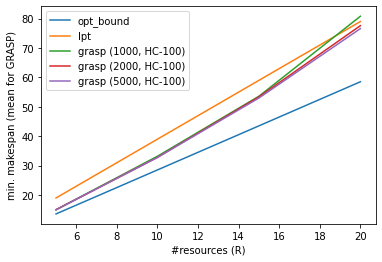

In [16]:
df.plot.line(xlabel='#resources (R)', ylabel='min. makespan (mean for GRASP)')